In [ ]:
#Working with Text Data and Naive Bayes in Scikit-Learn

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn import metrics
import seaborn as sns; sns.set()

In [ ]:
#Dtrees

In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()

In [ ]:
y = boston.target
new_boston = pd.DataFrame(boston.data)

In [ ]:
#1 First, use boston.corr() to show what features are correlated with each other.
new_boston.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
1,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
2,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
3,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
4,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
5,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
6,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
7,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
8,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
9,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


In [ ]:
#2 The columns don't have any labels. This happens with some datasets. According to the column values shown 
# in https://www.kaggle.com/c/boston-housing, you need to label the columns. Note: only label 13 columns 
# (the website has 14 labels for the columns), remove the last one of 'medv'. And use boston.corr() again.
# medv already removed
new_boston.columns = boston.feature_names
new_boston.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


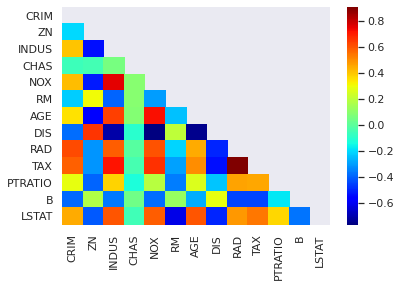

In [ ]:
#3 Now, you have the numbers from the correlation matrix, but it's not as easy to view or interpret as a plot. Please plot correlations by color according to the following figure and giving the labels of x and y:
x = new_boston.corr()
y = np.triu(x)
sns.heatmap(x, mask = y, cmap = "jet")
plt.rcParams["figure.figsize"] = 10,10
plt.show()

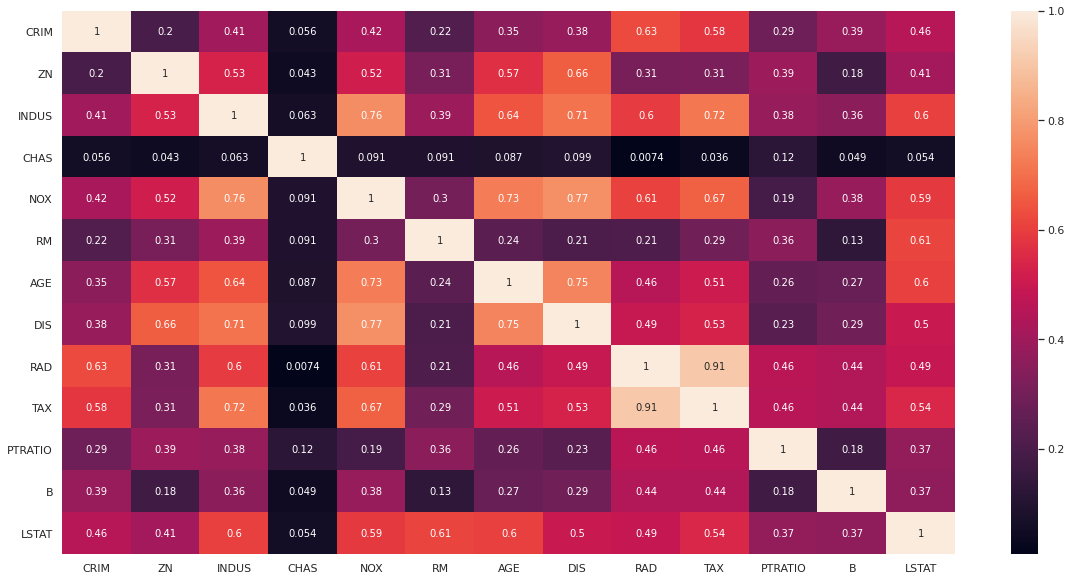

In [ ]:
#4 In the above plot, what features are highly correlated? Which features are highly uncorrelated?
plt.figure(figsize=(20,10))
sns.heatmap(new_boston.corr().abs(), annot=True)

In [ ]:
#5 First, please split the data into two datasets as “training” dataset and “test” dataset by train_test_split(). According to the four steps taught in the classes, please train the model by linear regression.
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot as plt
y = pd.DataFrame(boston.target)

boston_X_train, boston_X_test, boston_y_train, boston_y_test = train_test_split(new_boston, y , test_size = 0.3, random_state = 3)

regr = DecisionTreeRegressor()

regr.fit(boston_X_train, boston_y_train)

print(boston_X_train.shape)
print(boston_X_test.shape)
print(boston_y_train.shape)
print(boston_y_test.shape)


(354, 13)
(152, 13)
(354, 1)
(152, 1)


In [ ]:
# Predict and Score Model
#6. Then, please predict new values using the test set.
boston_y_pred = regr.predict(boston_X_test)
print(boston_y_pred.shape)
print("Predition: ", boston_y_pred)
print("Train Accuracy: " , regr.score(boston_X_train,boston_y_train))
print("Test Accuracy: " , regr.score(boston_X_test,boston_y_test))

(152,)
Predition:  [39.8 17.7 13.4 31.1 20.9 20.3 14.5  7.5 20.6 22.5  8.1 22.  34.6 31.
  5.  17.8 23.1 15.1 14.5 22.  22.  42.3 24.8 24.1  8.5 25.  27.1 20.2
 21.  24.  19.1 36.1 10.2 21.  13.6 13.1 25.  36.1 18.6 24.8 16.8 10.5
 27.1 19.  19.6 28.7 22.5 22.5 30.1 19.6 25.  19.2 50.  20.4 19.4 15.
 50.  13.1 31.1 19.6 18.3 23.  28.2 30.5 22.6 21.2 33.4 22.6 28.5 25.
 25.  27.5 17.  30.5  9.6 17.8 17.4 27.  22.  14.2 26.6 16.7 13.8 20.4
 21.4 12.3 25.   8.5 20.9 25.  21.  24.5 26.4 46.7 23.6 14.9 48.5 10.2
 22.9 33.2 19.2 19.8 14.1 19.6 29.  13.8 20.1 16.5 23.1 35.2 16.3  8.3
 15.4 25.  24.8 16.2 33.2 30.5 24.4 31.1 15.  10.5 13.1 24.3 22.5 27.1
 16.6 32.2 19.  21.2 22.  46.7  9.5 29.9 20.2 14.5 20.1  7.5 21.  24.8
 13.3 22.2 31.5 21.2 17.2 50.  14.1 21.2 19.4 10.2  8.1 23.5]
Train Accuracy:  1.0
Test Accuracy:  0.6921330103995491


In [ ]:
#8
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print('Mean squared error: %.2f' % mean_squared_error(boston_y_test, boston_y_pred))
print('Mean absolute error: %.2f' % mean_absolute_error(boston_y_test, boston_y_pred))
print('R Squared: %.2f' % r2_score(boston_y_test, boston_y_pred))

Mean squared error: 24.21
Mean absolute error: 3.39
R Squared: 0.69


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 13, random_state = 0)
regressor.fit(boston_X_train, boston_y_train)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=13, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
boston_y_pred = regressor.predict(boston_X_test)
print(boston_y_pred.shape)
print("Predition: ", boston_y_pred)
print("Train Accuracy: " , regressor.score(boston_X_train,boston_y_train))
print("Test Accuracy: " , regressor.score(boston_X_test,boston_y_test))

(152,)
Predition:  [41.66923077 15.9        23.72307692 31.11538462 21.01538462 21.5
 14.30769231  6.99230769 20.93076923 17.6        13.43846154 28.55384615
 33.65384615 28.28461538  6.28461538 10.63076923 21.06923077 13.82307692
 14.35384615 21.69230769 32.26153846 43.46153846 23.15384615 24.00769231
 11.99230769 24.62307692 19.30769231 20.39230769 20.45384615 20.91538462
 14.59230769 34.90769231 19.24615385 21.58461538 16.23846154 11.83846154
 23.63846154 33.13076923 18.87692308 23.07692308 15.73076923  9.76153846
 21.73076923 16.70769231 20.93076923 26.84615385 22.         18.69230769
 27.26153846 20.91538462 27.90769231 21.36923077 47.68461538 20.22307692
 20.60769231 17.73076923 49.63076923 13.56923077 28.87692308 20.92307692
 19.89230769 22.31538462 31.59230769 30.77692308 20.75384615 21.69230769
 33.00769231 21.77692308 27.         23.93846154 24.04615385 26.29230769
 15.30769231 28.56153846 10.91538462 19.09230769 19.90769231 25.32307692
 25.24615385 14.58461538 26.45384615 14

In [ ]:
#8-2
new_boston_mod = new_boston.drop(columns=['CHAS'])
boston_X_train1, boston_X_test1, boston_y_train1, boston_y_test1 = train_test_split(new_boston_mod, y ,test_size = 0.1, random_state= 3)
regr1 = DecisionTreeRegressor()
model = regr1.fit(boston_X_train1,boston_y_train1)
boston_y_pred1 = model.predict(boston_X_test1)

print("Train accuracy:", regr1.score(boston_X_train1,boston_y_train1))
print("Test accuracy:", regr1.score(boston_X_test1,boston_y_test1))
print('Mean squared error: %.2f'% mean_squared_error(boston_y_test1, boston_y_pred1))
print('Mean absolute error: %.2f'% mean_absolute_error(boston_y_test1, boston_y_pred1))
print('R squared: %.2f'% r2_score(boston_y_test1, boston_y_pred1))

Train accuracy: 1.0
Test accuracy: 0.7587587645370093
Mean squared error: 17.35
Mean absolute error: 2.76
R squared: 0.76


In [ ]:
#8-2
from sklearn.linear_model import Ridge
new_boston_mod = new_boston.drop(columns=['CHAS'])
boston_X_train1, boston_X_test1, boston_y_train1, boston_y_test1 = train_test_split(new_boston_mod, y ,test_size = 0.1, random_state= 3)
regr1 = RandomForestRegressor()
model = regr1.fit(boston_X_train1,boston_y_train1)
boston_y_pred1 = model.predict(boston_X_test1)

print("Train accuracy:", regr1.score(boston_X_train1,boston_y_train1))
print("Test accuracy:", regr1.score(boston_X_test1,boston_y_test1))
print('Mean squared error: %.2f'% mean_squared_error(boston_y_test1, boston_y_pred1))
print('Mean absolute error: %.2f'% mean_absolute_error(boston_y_test1, boston_y_pred1))
print('R squared: %.2f'% r2_score(boston_y_test1, boston_y_pred1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Train accuracy: 0.980161915139367
Test accuracy: 0.9117730547409957
Mean squared error: 6.35
Mean absolute error: 1.78
R squared: 0.91
